In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
data.shape

(1338, 7)

In [5]:
print("No of Rows:",data.shape[0])
print("No of Cols:",data.shape[1])

No of Rows: 1338
No of Cols: 7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [15]:
data.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [12]:
data['sex'] = data['sex'].map({'female':0,'male':1})

In [14]:
data['smoker'] = data['smoker'].map({'yes':1,'no':0})

In [16]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [18]:
data['region'] = data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [19]:
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


In [20]:
data.describe()

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.665471,1.094918,0.204783,2.484305,13270.422414
std,14.049960,0.500160,6.098382,1.205493,0.403694,1.104885,12110.011240
min,18.000000,0.000000,16.000000,0.000000,0.000000,1.000000,1121.870000
25%,27.000000,0.000000,26.300000,0.000000,0.000000,2.000000,4740.287500
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.030000
75%,51.000000,1.000000,34.700000,2.000000,0.000000,3.000000,16639.915000
max,64.000000,1.000000,53.100000,5.000000,1.000000,4.000000,63770.430000


In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X = data.drop('expenses',axis=1)

In [27]:
y = data['expenses']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [33]:
print(X_train.shape)
print(X_test.shape)

(1070, 6)
(268, 6)


In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)

svr = SVR()
svr.fit(X_train, y_train)

rf = RandomForestRegressor()
rf.fit(X_train, y_train)

gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [38]:
y_pred1 = lr.predict(X_test)
y_pred2 = svr.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [39]:
pred_df  = pd.DataFrame({"Actual":y_test,"lr":y_pred1,"svr":y_pred2,"rf":y_pred3,"gr":y_pred4})

In [41]:
pred_df

,Actual,lr,svr,rf,gr
1099,3227.12,5693.721208,9258.300435,9313.1237,5190.130533
759,36307.80,28341.704438,9242.023280,37366.0724,37336.317420
215,7371.77,11067.611001,9352.150963,7521.2718,7264.397587
903,8125.78,12059.973692,9405.615109,9655.0918,10627.380534
989,14571.89,24820.775461,9254.375200,15652.1523,20770.329559
...,...,...,...,...,...
408,6652.53,5890.676898,9325.490757,7668.3087,6615.816358
466,13224.69,12608.673046,9463.798542,20283.7158,15700.417668
724,10106.13,10402.583633,9408.007306,11403.9302,10894.388098
693,2352.97,1707.379146,9252.187301,3777.6044,4042.137525


In [42]:
import matplotlib.pyplot as plt

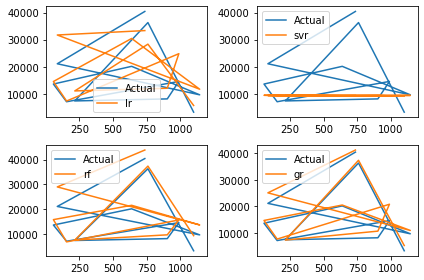

In [46]:
plt.subplot(2,2,1)
plt.plot(pred_df["Actual"].iloc[0:11], label="Actual")
plt.plot(pred_df["lr"].iloc[0:11], label="lr")
plt.legend()

plt.subplot(2,2,2)
plt.plot(pred_df["Actual"].iloc[0:11], label="Actual")
plt.plot(pred_df["svr"].iloc[0:11], label="svr")
plt.legend()

plt.subplot(2,2,3)
plt.plot(pred_df["Actual"].iloc[0:11], label="Actual")
plt.plot(pred_df["rf"].iloc[0:11], label="rf")
plt.legend()

plt.subplot(2,2,4)
plt.plot(pred_df["Actual"].iloc[0:11], label="Actual")
plt.plot(pred_df["gr"].iloc[0:11], label="gr")
plt.legend()

plt.tight_layout()

In [48]:
from sklearn import metrics

metrics.r2_score(y_test, y_pred4)

0.8527357813197469